## Arima model(0,0,10) is used to predict percentage change in stock price. Percentage change is used because it appears to be stationary. p = d = 0 based on suggestion by auto arima, and also there is no seasonality and percentage change data is already stationary. A 10th order moving average was chosen so that the prediction shows some variance rather than producing a linear mean.

## Import libraries, load Nvidia data set as dataframe

In [11]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [12]:
df = pd.read_csv('NVDA.csv',index_col='Date',parse_dates=True)
df = df.dropna()
print(df.shape)
df.head()

(5978, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376518,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415963,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383690,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382495,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381300,22752000


## Close price of Nvidia not stationary

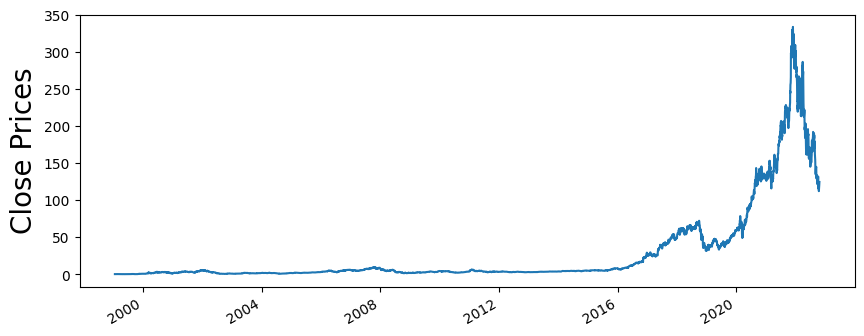

In [13]:
plt.figure(figsize=(10,4))
close = df['Close']
plt.plot(close)
plt.gcf().autofmt_xdate()
plt.ylabel('Close Prices', fontsize=20)
plt.show()

## Evaluate whether percentage change in price is stationary

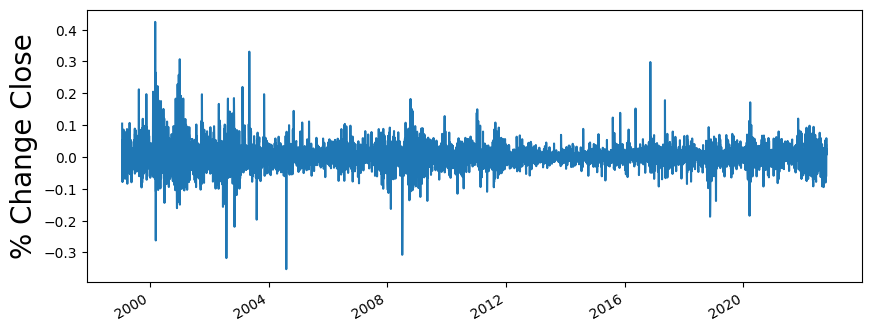

In [14]:
plt.figure(figsize=(10,4))
df['%Change'] = df['Close'].pct_change()
percent_change = df['%Change'].dropna()
plt.plot(percent_change)
plt.gcf().autofmt_xdate()
plt.ylabel('% Change Close', fontsize=20)
plt.show()

## Percentage change is stationary with no seasonality in data

In [15]:
avg_percent_change = df['%Change'].mean()
print(f"Average percentage change: {avg_percent_change}")
print(f"Based on plot and mean calculation the percentage change of nvidia is stationary, can apply ARIMA.")

Average percentage change: 0.0016824336685059855
Based on plot and mean calculation the percentage change of nvidia is stationary, can apply ARIMA.


In [27]:
step_wise_fit = auto_arima(df['%Change'].dropna(), trace=True, suppress_warnings=True)
step_wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-22057.914, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22055.914, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-22055.909, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-22048.341, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22053.914, Time=0.76 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 5.103 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5977
Model:                        SARIMAX   Log Likelihood               11030.957
Date:                Sun, 23 Oct 2022   AIC                         -22057.914
Time:                        11:50:58   BIC                         -22044.523
Sample:                             0   HQIC                        -22053.263
                               - 5977                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      3.361      0.001       0.001       0.003
sigma2         0.0015   1.04e-05    140.324      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33370.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split data set for training / testing

In [17]:
df_temp = df.reset_index()
data_rows = df_temp.shape[0]
training_size = df_temp.shape[0] # Use entire dat set for training model for submission
# training_size = df_temp.shape[0] # round(data_rows * 0.90) # 90% for training
train_df = df_temp.iloc[:training_size]
test_df = df_temp.iloc[training_size:]

In [18]:
train_df = train_df.reset_index()
# 5 day seasonality, to avoid risk and exposure to news over weekends
model = ARIMA(train_df['%Change'].dropna(),order=(0,0,10)) 
model = model.fit()
model.summary()

/Users/justinhoe/Desktop/NUS Fintech/nvidia/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/justinhoe/Desktop/NUS Fintech/nvidia/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/justinhoe/Desktop/NUS Fintech/nvidia/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                %Change   No. Observations:                 5977
Model:                ARIMA(0, 0, 10)   Log Likelihood               11041.650
Date:                Sun, 23 Oct 2022   AIC                         -22059.299
Time:                        11:06:14   BIC                         -21978.951
Sample:                             0   HQIC                        -22031.391
                               - 5977                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.000      3.453      0.001       0.001       0.003
ma.L1          0.0004      0.009      0.041      0.968      -0.017       0.017
ma.L2         -0.0016      0.008     -0.203      0.839      -0.017       0.014
ma.L3          0.0073      0.008      0.866      0.386      -0.009       0.024
ma.L4          0.0118      0.008      1.461      0.144      -0.004       0.028
ma.L5         -0.0264      0.008     -3.363      0.001      -0.042      -0.011
ma.L6         -0.0016      0.009     -0.182      0.856      -0.018       0.015
ma.L7          0.0055      0.009      0.588      0.556      -0.013       0.024
ma.L8         -0.0476      0.010     -4.981      0.000      -0.066      -0.029
ma.L9          0.0098      0.010      0.984      0.325      -0.010       0.029
ma.L10         0.0088      0.009      0.959      0.338      -0.009       0.027
sigma2         0.0015   1.06e-05    136.914      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             32934.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Generate 10 predictions for next 10 trading days

In [22]:
pred=model.predict(start=training_size, end=training_size+10,type='levels')
# pred=model.predict(start=training_size, end=training_size+9,type='levels')
pred

/Users/justinhoe/Desktop/NUS Fintech/nvidia/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5978   -0.000902
5979    0.005510
5980   -0.001285
5981    0.000987
5982    0.002166
5983    0.001311
5984    0.000897
5985    0.001961
5986    0.001845
5987    0.001679
5988    0.001679
Name: predicted_mean, dtype: float64

,Date,Open,High,Low,Close,Adj Close,Volume,%Change


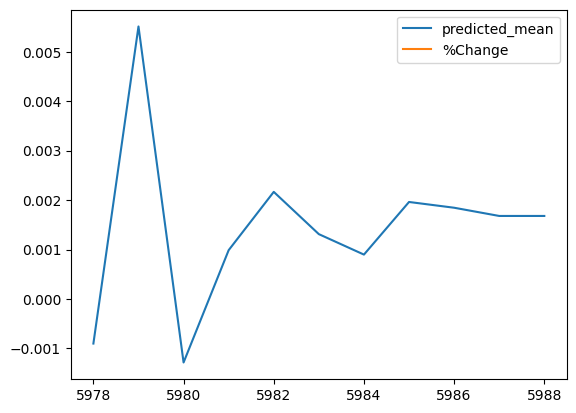

In [23]:
pred.plot(legend=True)
test_df['%Change'].plot(legend=True)
test_df

# Prediction for NVIDIA 22 Oct - 4 Nov

In [24]:
LAST_CLOSE = 124.66 # 22 OCT
close_predictions = []
for p in pred:
    LAST_CLOSE =LAST_CLOSE + (LAST_CLOSE*p)
    close_predictions.append(LAST_CLOSE)

In [26]:
print(close_predictions)

[124.54755467279664, 125.23384806641342, 125.07296433510055, 125.19635070286478, 125.46747190491607, 125.63191223162707, 125.74460475056785, 125.99121706328015, 126.22364376961781, 126.43551266232524, 126.64773718117651]
